In [166]:
import pandas as pd
from path import Path
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [167]:
data_path = "Levels_Fyi_Salary_data.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(62642, 29)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.columns

In [168]:
df1 = df[df["title"] == "Data Scientist"]
filtered_columns = ["title", "company", "location", "yearsofexperience", "totalyearlycompensation",
                    "gender", "Doctorate_Degree", "Masters_Degree", "Bachelors_Degree", "tag"]
df2 = df1[filtered_columns]
print(df1.shape)
df2

(2578, 29)


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0,0,ML / AI
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI


In [ ]:
print(df1["tag"].value_counts().head(50))

In [169]:
form_state_one = r'(\w+\s)*(\w+),\s([A-Z]{2})$'
matches_form_one = df2.location.str.contains(form_state_one, flags=re.IGNORECASE, na=False)
no_form_one = df2.location.str.contains(form_state_one, flags=re.IGNORECASE, na=False).sum()
print(no_form_one)

form_state_two = r'(\w+\s)*(\w+),\s([A-Z]{2}),\s(\w+)'
matches_form_two = df2.location.str.contains(form_state_two, flags=re.IGNORECASE, na=False)
no_form_two = df2.location.str.contains(form_state_two, flags=re.IGNORECASE, na=False).sum()
print(no_form_two)


df2.location[~matches_form_one & ~matches_form_two]

2226
351


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


9061    Tel Aviv, Israel
Name: location, dtype: object

In [170]:
def US_location_to_state(city):
    # if input is of the form $###,###,###
    if re.match(form_state_one, city, flags=re.IGNORECASE):

        # remove city name and commas
        state = re.sub('(\w+\s)*(\w+),\s','', city)
        
        # return state
        return state
    # otherwise, return NaN
    else:
        return np.nan
    

def location_to_city(city):
    # if input is of the form $###,###,###
    if re.match(form_state_one, city, flags=re.IGNORECASE):

        # remove city name and commas
        city = re.sub(',\s([A-Z]{2})$','', city)
        
        # return state
        return city
    # otherwise, return NaN
    else:
        return np.nan

In [171]:
df3 = df2.loc[df2.location != "Tel Aviv, Israel"]
df3

,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0,0,ML / AI
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI


In [172]:
df3['state'] = df3.location.str.extract(f'({form_state_one}|{form_state_two})', flags=re.IGNORECASE)[0].apply(US_location_to_state)
print(df2.shape)
df3

(2578, 10)


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis,CA
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI,WA
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN,CA
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI,CA
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN,WA
...,...,...,...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI,DC
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0,0,ML / AI,NaN
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research,NJ
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI,WA


In [173]:
df3 = df3[df3["state"].notna()]
df3

,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis,CA
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI,WA
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN,CA
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI,CA
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN,WA
...,...,...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,"Chicago, IL",3.0,190000,Male,0,0,0,ML / AI,IL
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI,DC
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research,NJ
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI,WA


In [174]:
df3['city'] = df3.location.str.extract(f'({form_state_one})', flags=re.IGNORECASE)[0].apply(location_to_city)
print(df3.shape)
df3

(2226, 12)


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN,CA,San Jose
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI,CA,San Francisco
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,"Chicago, IL",3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI,DC,Washington
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research,NJ,Roseland
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI,WA,Kirkland


In [175]:
df3.drop('location', axis=1, inplace=True)
df3

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
454,Data Scientist,Twitter,4.0,500000,Male,0,0,0,ML / AI,CA,San Francisco
495,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,0,ML / AI,DC,Washington
62285,Data Scientist,ADP,8.0,185000,Male,0,0,0,UX Research,NJ,Roseland
62529,Data Scientist,Google,22.0,685000,Male,0,0,0,ML / AI,WA,Kirkland


In [ ]:
companies = df3.company.value_counts()
a = 0
for company in range(0,396):
    if companies[company] > 5:
        a = a+1
        
print(a)
companies

In [ ]:
#Binning he companies- .cut with 4 bins...do we want to specifically design these?
bin_labels = ['Small', 'Medium', 'Large', 'Very Large']
bins4 = df3['company'].value_counts()
company_bins = pd.cut(bins4, bins=4, labels=bin_labels).to_list()#does this solve the issue of imbalanced data?
company_bins





#replace_company = list(companies[companies < 20].index)

# Replace in dataframe
#for co in replace_company:
#    df3.company = df3.company.replace(co,"Other")
    
# Check to make sure binning was successful
#df3.company.value_counts()


In [ ]:
#change company name to bin name
companies = []
for company in df3['company']:
    if company == "Amazon" or company == "Microsoft" or company == "Facebook":
        company = "Large"
    elif company == "Google" or company == "Apple" or company == "IBM" or company=="Uber":
        company = "Medium"
    else:
        company = "Small"
    companies.append(company)

In [ ]:
#reassign company column to bin name
df3['company'] = companies
df3.head(10)
# clean_bins_df['gender'].value_counts()

In [ ]:
tags = df3.tag.value_counts()
replace_tag = list(tags[tags < 5].index)

# Replace in dataframe
for ts in replace_tag:
    df3.tag = df3.tag.replace(ts,"Other")
    
# Check to make sure binning was successful
df3.tag.value_counts()

In [ ]:
state_count = df3["state"].value_counts()
state_count

In [ ]:
replace_state = list(state_count[state_count < 20].index)

# Replace in dataframe
for st in replace_state:
    df3.state = df3.state.replace(st,"Other")
    
# Check to make sure binning was successful
df3.state.value_counts()

In [176]:
gender_count = df3["gender"].value_counts()
gender_count

Male      1145
Female     323
Other       19
Name: gender, dtype: int64

In [177]:
df3 = df3[df3["gender"].notna()]
df3

,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
454,Data Scientist,Twitter,4.0,500000,Male,0,0,0,ML / AI,CA,San Francisco
495,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,0,ML / AI,DC,Washington
62285,Data Scientist,ADP,8.0,185000,Male,0,0,0,UX Research,NJ,Roseland


In [ ]:
df2.to_csv("DataScience.csv", sep=',', header=True, encoding='utf-8', index=False)

In [178]:
df4 = df3[df3["totalyearlycompensation"] < 500000]
df4

,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
495,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
499,Data Scientist,Amazon,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Amazon,10.0,260000,Female,0,0,0,Full Stack,CA,Palo Alto
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,0,ML / AI,DC,Washington


In [179]:
df4 = df4[df4["totalyearlycompensation"] > 30000]
df4

,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
495,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
499,Data Scientist,Amazon,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Amazon,10.0,260000,Female,0,0,0,Full Stack,CA,Palo Alto
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,0,ML / AI,DC,Washington


In [180]:
df4 = df4[df4["yearsofexperience"] < 21]
df4

,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
495,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
499,Data Scientist,Amazon,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Amazon,10.0,260000,Female,0,0,0,Full Stack,CA,Palo Alto
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,0,ML / AI,DC,Washington


In [181]:
df4.drop(df4.loc[(df4['yearsofexperience']==0) & (df4["totalyearlycompensation"] > 250000)].index, inplace=True)
df4

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
495,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
499,Data Scientist,Amazon,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Amazon,10.0,260000,Female,0,0,0,Full Stack,CA,Palo Alto
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,0,ML / AI,DC,Washington


In [182]:
df4.drop(df4.loc[(df4['yearsofexperience']>5) & (df4["totalyearlycompensation"] < 45000)].index, inplace=True)
df4

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
495,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
499,Data Scientist,Amazon,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Amazon,10.0,260000,Female,0,0,0,Full Stack,CA,Palo Alto
62119,Data Scientist,Procter & Gamble,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,0,ML / AI,DC,Washington


In [ ]:
df4.drop(df4.loc[df4['gender'] == "Other"].index, inplace=True)
df4

In [183]:
headers1 = ["company", "yearsofexperience", "Doctorate_Degree", "Masters_Degree", "Bachelors_Degree", "state", "city", "tag", "gender", "totalyearlycompensation"]
cat = ["company", "state", "city", "tag", "gender"]
df_clean1 = df4[headers1]
df_clean1

,company,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,state,city,tag,totalyearlycompensation
419,LinkedIn,4.0,0,0,0,CA,San Francisco,Data Analysis,233000
440,Microsoft,11.0,0,0,0,WA,Seattle,ML / AI,218000
444,ebay,10.0,0,0,0,CA,San Jose,NaN,180000
495,Facebook,8.0,0,0,0,WA,Seattle,NaN,370000
499,Amazon,3.0,0,0,0,WA,Seattle,ML / AI,200000
...,...,...,...,...,...,...,...,...,...
62089,Amazon,10.0,0,0,0,CA,Palo Alto,Full Stack,260000
62119,Procter & Gamble,5.0,0,0,0,OH,Cincinnati,ML / AI,135000
62233,Deloitte,3.0,0,0,0,IL,Chicago,ML / AI,190000
62240,IBM,5.0,0,0,0,DC,Washington,ML / AI,155000


In [184]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean1[cat]), index=df_clean1.index)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_3M,company_3m,company_ABB,company_ADP,company_AMAZON,company_ASML,company_AT&T,company_AWS,company_Accenture,company_Acorns,...,tag_operations,tag_predictive modeling,tag_product,tag_product analytics,tag_product org,tag_project management,tag_recommender systems,tag_scot,tag_survey analysis,tag_nan
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
# Merge one-hot encoded features and drop the originals
df_clean1 = df_clean1.merge(encode_df,left_index=True, right_index=True)
df_clean1 = df_clean1.drop(cat,1)
df_clean1

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,totalyearlycompensation,company_3M,company_3m,company_ABB,company_ADP,company_AMAZON,...,tag_operations,tag_predictive modeling,tag_product,tag_product analytics,tag_product org,tag_project management,tag_recommender systems,tag_scot,tag_survey analysis,tag_nan
419,4.0,0,0,0,233000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,11.0,0,0,0,218000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444,10.0,0,0,0,180000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
495,8.0,0,0,0,370000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
499,3.0,0,0,0,200000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62089,10.0,0,0,0,260000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62119,5.0,0,0,0,135000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62233,3.0,0,0,0,190000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62240,5.0,0,0,0,155000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
# Split our preprocessed data into our features and target arrays
y = df_clean1.totalyearlycompensation
X = df_clean1.drop(columns=["totalyearlycompensation"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.8)

In [187]:
from sklearn.svm import SVR
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


X_train_scaled1 = MinMaxScaler().fit_transform(X_train)
X_test_scaled1 = MinMaxScaler().fit_transform(X_test)
X_train_scaled1

array([[0.05, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.1 , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.35, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.1 , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [188]:
lr = LinearRegression()
lr

LinearRegression()

In [189]:
lr.fit(X_train_scaled1, y_train)
predictions = lr.predict(X_test_scaled1)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
55211,-1.192929e+17,360000
6750,-1.005624e+18,108000
38743,-4.632737e+17,209000
20219,2.069120e+05,245000
56494,-1.192929e+17,172000
...,...,...
31066,2.230400e+05,198000
29730,-1.287600e+15,81000
42994,3.020800e+05,414000
16963,9.829251e+17,140000


In [190]:
training_score = lr.score(X_train_scaled1, y_train)
testing_score = lr.score(X_test_scaled1, y_test)
mse = mean_absolute_percentage_error(y_test, predictions)
#rmse = mse**.5
print(mse)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

1471073451501.9841
Training Score: 0.7821271038240216
Testing Score: -5.333660041024919e+25


In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

Y_pred = regressor.predict(X_test)  # test the output by changing values

In [201]:
pred = pd.DataFrame({"Prediction": Y_pred, "Actual": y_test})
pred.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(pred)

        Prediction  Actual
0    261330.000000  360000
1    130754.642857  108000
2    265834.000000  209000
3    174575.000000  245000
4    298240.000000  172000
5    150580.000000  135000
6    190060.000000  143000
7    136200.000000  125000
8    149590.000000  142000
9    121790.000000  119000
10   161017.380952  130000
11   222823.333333  158000
12   217485.000000  165000
13   210300.000000  215000
14   321670.000000  451000
15   116860.000000  140000
16   180390.000000  181000
17   162826.666667  263000
18   199574.000000  208000
19   329070.000000  412000
20   367602.500000  400000
21   282010.000000  245000
22   109790.000000   75000
23   183151.666667  160000
24   126433.333333   78000
25   231150.000000  195000
26   138270.000000  140000
27   166571.666667  130000
28   227050.000000  205000
29   192868.333333  197000
30   145256.666667  141000
31   193256.666667  205000
32   189370.000000  142000
33   141440.000000  150000
34   350030.000000  467000
35   254531.666667  228000
3

In [193]:
# save
import joblib
joblib.dump(regressor, "./RF_model.joblib")

['./RF_model.joblib']

In [194]:
loaded_rf = joblib.load("./RF_model.joblib")

In [195]:
training_score = loaded_rf.score(X_train, y_train)
testing_score = loaded_rf.score(X_test, y_test)
mse = mean_absolute_percentage_error(y_test, Y_pred)
rmse = mse**.5
print(mse)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

0.1816953211574165
Training Score: 0.9147068206545448
Testing Score: 0.61007211321294


In [196]:
import statsmodels.api as sm

mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
for i in range(0,878):
#p_values
    print(p_values.index[i],"      " , p_values[i])

yearsofexperience        4.89197642957753e-65
Doctorate_Degree        4.038405976544712e-08
Masters_Degree        0.8147551166628396
Bachelors_Degree        0.13150164566653122
company_3M        0.7219013141040402
company_3m        0.9936135335871057
company_ABB        0.40551373201805807
company_ADP        0.6251015135676181
company_AMAZON        0.5445468435906172
company_ASML        0.5512864060489819
company_AT&T        0.943686346393847
company_AWS        0.2080505652873269
company_Accenture        0.020663625404768855
company_Acorns        0.9225433676366261
company_Addepar        0.6246270591445975
company_Adobe        4.896905998936824e-07
company_Aetna        0.9416236031247412
company_Affirm        0.8524303445532604
company_Airbnb        9.462160566185568e-14
company_Allstate        0.16565460225983883
company_Amadeus        0.6084981454753982
company_Amazon        6.046441735682275e-07
company_Amazon Web Services        0.011217485769778691
company_Amazon.com        0.78771

IndexError: index 712 is out of bounds for axis 0 with size 712

In [ ]:
df_clean1.columns

In [ ]:
importances = regressor.feature_importances_
importances

In [ ]:
#print(regressor.feature_importances_)
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(regressor, prefit=True)
sel.transform(X_train)
sel.get_support()

In [92]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [93]:
len(X_train_scaled[0])

878

In [128]:
#### Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 900
hidden_nodes_layer2 = 900
hidden_nodes_layer3 = 300
hidden_nodes_layer4 = 100

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# 4th hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 900)               791100    
                                                                 
 dense_11 (Dense)            (None, 900)               810900    
                                                                 
 dense_12 (Dense)            (None, 300)               270300    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,902,501
Trainable params: 1,902,501
Non-trainable params: 0
_________________________________________________________________


In [129]:
# Compile the model
nn3.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.mean_absolute_percentage_error])

In [152]:
# Train the model
fit_model = nn3.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
54/54 [==============================] - 0s 8ms/step - loss: 1011555968.0000 - mean_absolute_percentage_error: 10.1763
Epoch 2/5
54/54 [==============================] - 0s 7ms/step - loss: 1039790784.0000 - mean_absolute_percentage_error: 10.5676
Epoch 3/5
54/54 [==============================] - 0s 7ms/step - loss: 1033920064.0000 - mean_absolute_percentage_error: 10.5535
Epoch 4/5
54/54 [==============================] - 0s 7ms/step - loss: 1038691392.0000 - mean_absolute_percentage_error: 10.4453
Epoch 5/5
54/54 [==============================] - 0s 7ms/step - loss: 994321024.0000 - mean_absolute_percentage_error: 10.2502


In [153]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, mean_absolute_percentage_error: {model_accuracy}")

14/14 - 0s - loss: 4391916032.0000 - mean_absolute_percentage_error: 26.9956 - 54ms/epoch - 4ms/step
Loss: 4391916032.0, mean_absolute_percentage_error: 26.995647430419922


In [154]:
import matplotlib as plt

<AxesSubplot:>

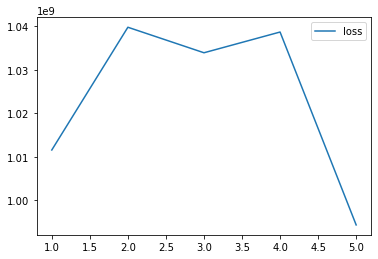

In [155]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

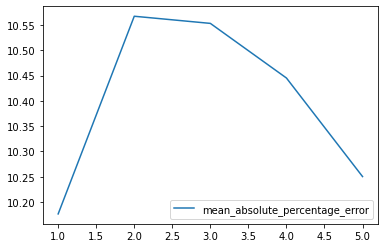

In [156]:
# Plot the accuracy
history_df.plot(y="mean_absolute_percentage_error")